# Task-04 Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import csv

# Importing Dataset

In [2]:
# Twitter_training dataset 
df = pd.read_csv(r'C:\Users\Dell\Desktop\Prodigy_task\Task 4\archive\twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
#Twitter_validation dataset
df1 = pd.read_csv(r'C:\Users\Dell\Desktop\Prodigy_task\Task 4\archive\twitter_validation.csv')
df1.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
#Naming Columns for Twitter_Training
column_names =['Tweet Id','Entity','Sentiment','Tweet Content']
df = pd.read_csv(r'C:\Users\Dell\Desktop\Prodigy_task\Task 4\archive\twitter_training.csv',names=column_names)
df.head()

,Tweet Id,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
print('Columns in Twitter_Training data:->',df.columns)

Columns in Twitter_Training data:-> Index(['Tweet Id', 'Entity', 'Sentiment', 'Tweet Content'], dtype='object')


In [7]:
#Naming columns for Twitter_validation
column_names =['Tweet Id','Entity','Sentiment','Tweet Content']
df1 = pd.read_csv(r'C:\Users\Dell\Desktop\Prodigy_task\Task 4\archive\twitter_validation.csv',names=column_names)
df1.head()

,Tweet Id,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [63]:
print('Columns in Twitter_Training data:->',df1.columns)

Columns in Twitter_Training data:-> Index(['Tweet Id', 'Entity', 'Sentiment', 'Tweet Content'], dtype='object')


In [9]:
print('Shape of Twitter_Training Dataset  :->',df.shape)
print('Shape of Twitter_Validation Dataset:->',df1.shape)

Shape of Twitter_Training Dataset  :-> (74682, 4)
Shape of Twitter_Validation Dataset:-> (1000, 4)


In [10]:
df.info()
print('----------------------------------------------\n')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet Id       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet Id       1000 non-null   int64 
 1   Entity         1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet Content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [13]:
df.isnull().sum()

Tweet Id           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [15]:
df['Tweet Content'].fillna('N/A' ,inplace=True)

In [16]:
df.isnull().sum()

Tweet Id         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [17]:
df1.isnull().sum()

Tweet Id         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [19]:
#Checking Duplicate Values in each dataset

print('Duplicate values In Twitter_Training Data:->',df.duplicated().sum())
print('-----------------------------------\n')
print('Duplicate values In Twitter_validation Data:->',df1.duplicated().sum())

Duplicate values In Twitter_Training Data:-> 2700
-----------------------------------

Duplicate values In Twitter_validation Data:-> 0


In [24]:
df.drop_duplicates(inplace = True)

In [25]:
#Checking Duplicate Values in each dataset

print('Duplicate values In Twitter_Training Data:->',df.duplicated().sum())
print('-----------------------------------\n')
print('Duplicate values In Twitter_validation Data:->',df1.duplicated().sum())

Duplicate values In Twitter_Training Data:-> 0
-----------------------------------

Duplicate values In Twitter_validation Data:-> 0


In [26]:
#Checking missing Values in each Dataset

print('Checking Missing Values in Gender Values:->',df.isna().sum().any())
print('--------------------------------------------------\n')
print('Checking Missing Values in Test Values:->',df1.isna().sum().any())

Checking Missing Values in Gender Values:-> False
--------------------------------------------------

Checking Missing Values in Test Values:-> False


In [31]:
# Statistical summary of Gender Dataset
df.describe(include = "all")

,Tweet Id,Entity,Sentiment,Tweet Content
count,71982.000000,71982,71982,71982
unique,NaN,32,4,69492
top,NaN,TomClancysRainbowSix,Negative,N/A
freq,NaN,2344,21787,326
mean,6437.396307,NaN,NaN,NaN
std,3743.198550,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3199.000000,NaN,NaN,NaN
50%,6434.000000,NaN,NaN,NaN
75%,9607.000000,NaN,NaN,NaN


In [30]:
# Statistical summary of Gender Dataset
df1.describe(include = "all")

,Tweet Id,Entity,Sentiment,Tweet Content
count,1000.000000,1000,1000,1000
unique,NaN,32,4,999
top,NaN,RedDeadRedemption(RDR),Neutral,Wow
freq,NaN,40,285,2
mean,6432.088000,NaN,NaN,NaN
std,3728.310569,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN
25%,3247.750000,NaN,NaN,NaN
50%,6550.000000,NaN,NaN,NaN
75%,9661.750000,NaN,NaN,NaN


In [34]:
id_types = df['Tweet Id'].value_counts()
id_types

Tweet Id
2401     6
5727     6
5754     6
5755     6
5756     6
        ..
5647     2
5810     2
10038    2
2895     2
3018     2
Name: count, Length: 12447, dtype: int64

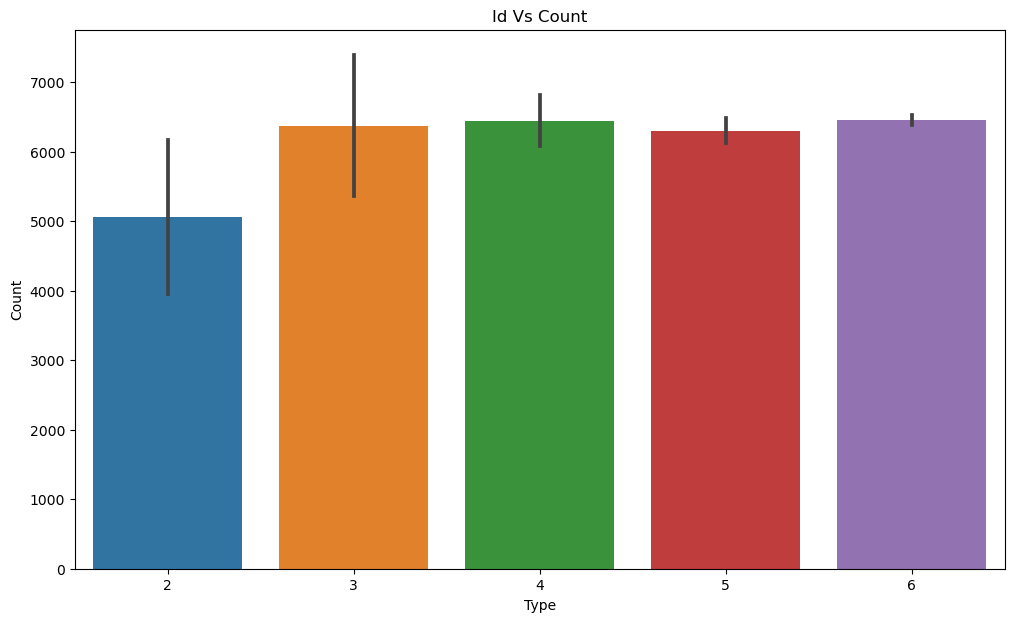

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Id Vs Count')
plt.show()

In [37]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21787
Positive      19811
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

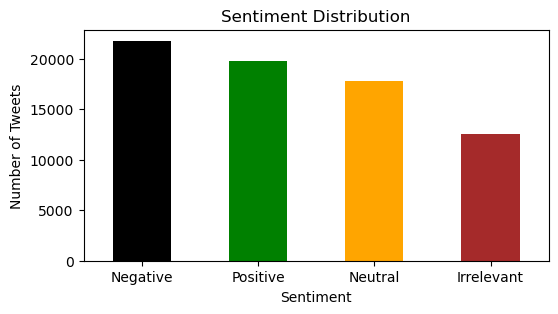

In [38]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['black', 'green', 'orange', 'brown'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [49]:
Entity_types = df['Entity'].value_counts()
Entity_types

Entity
TomClancysRainbowSix                 2344
Verizon                              2328
MaddenNFL                            2324
CallOfDuty                           2322
Microsoft                            2319
NBA2K                                2306
WorldOfCraft                         2304
LeagueOfLegends                      2303
TomClancysGhostRecon                 2301
Facebook                             2293
ApexLegends                          2289
Battlefield                          2267
Amazon                               2264
CallOfDutyBlackopsColdWar            2261
johnson&johnson                      2261
FIFA                                 2245
Dota2                                2229
Overwatch                            2229
Hearthstone                          2227
HomeDepot                            2226
Xbox(Xseries)                        2222
GrandTheftAuto(GTA)                  2214
Borderlands                          2211
Nvidia                     

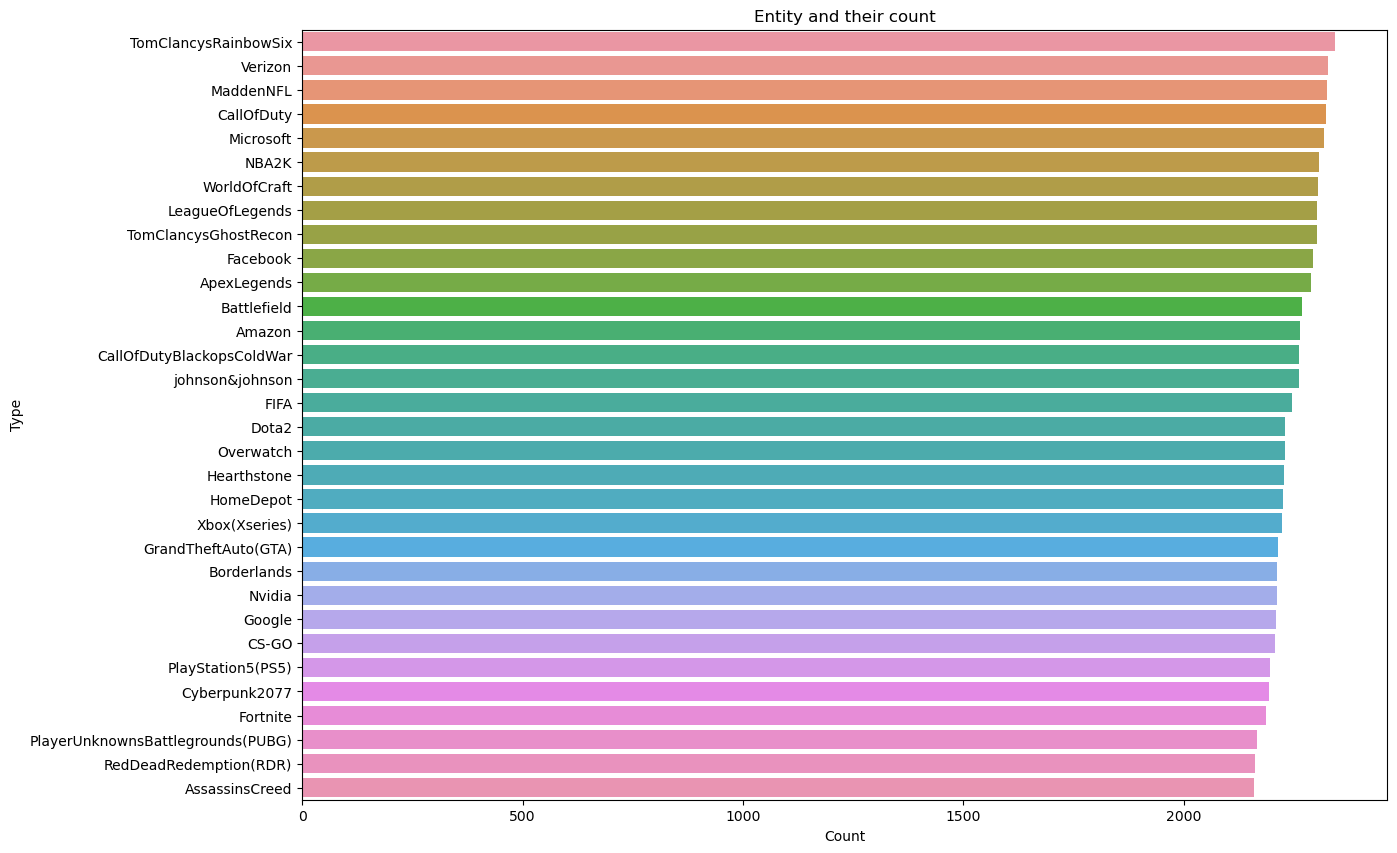

In [50]:
plt.figure(figsize=(14,10))

sns.barplot(x=Entity_types.values, y=game_types.index)
plt.title('Entity and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


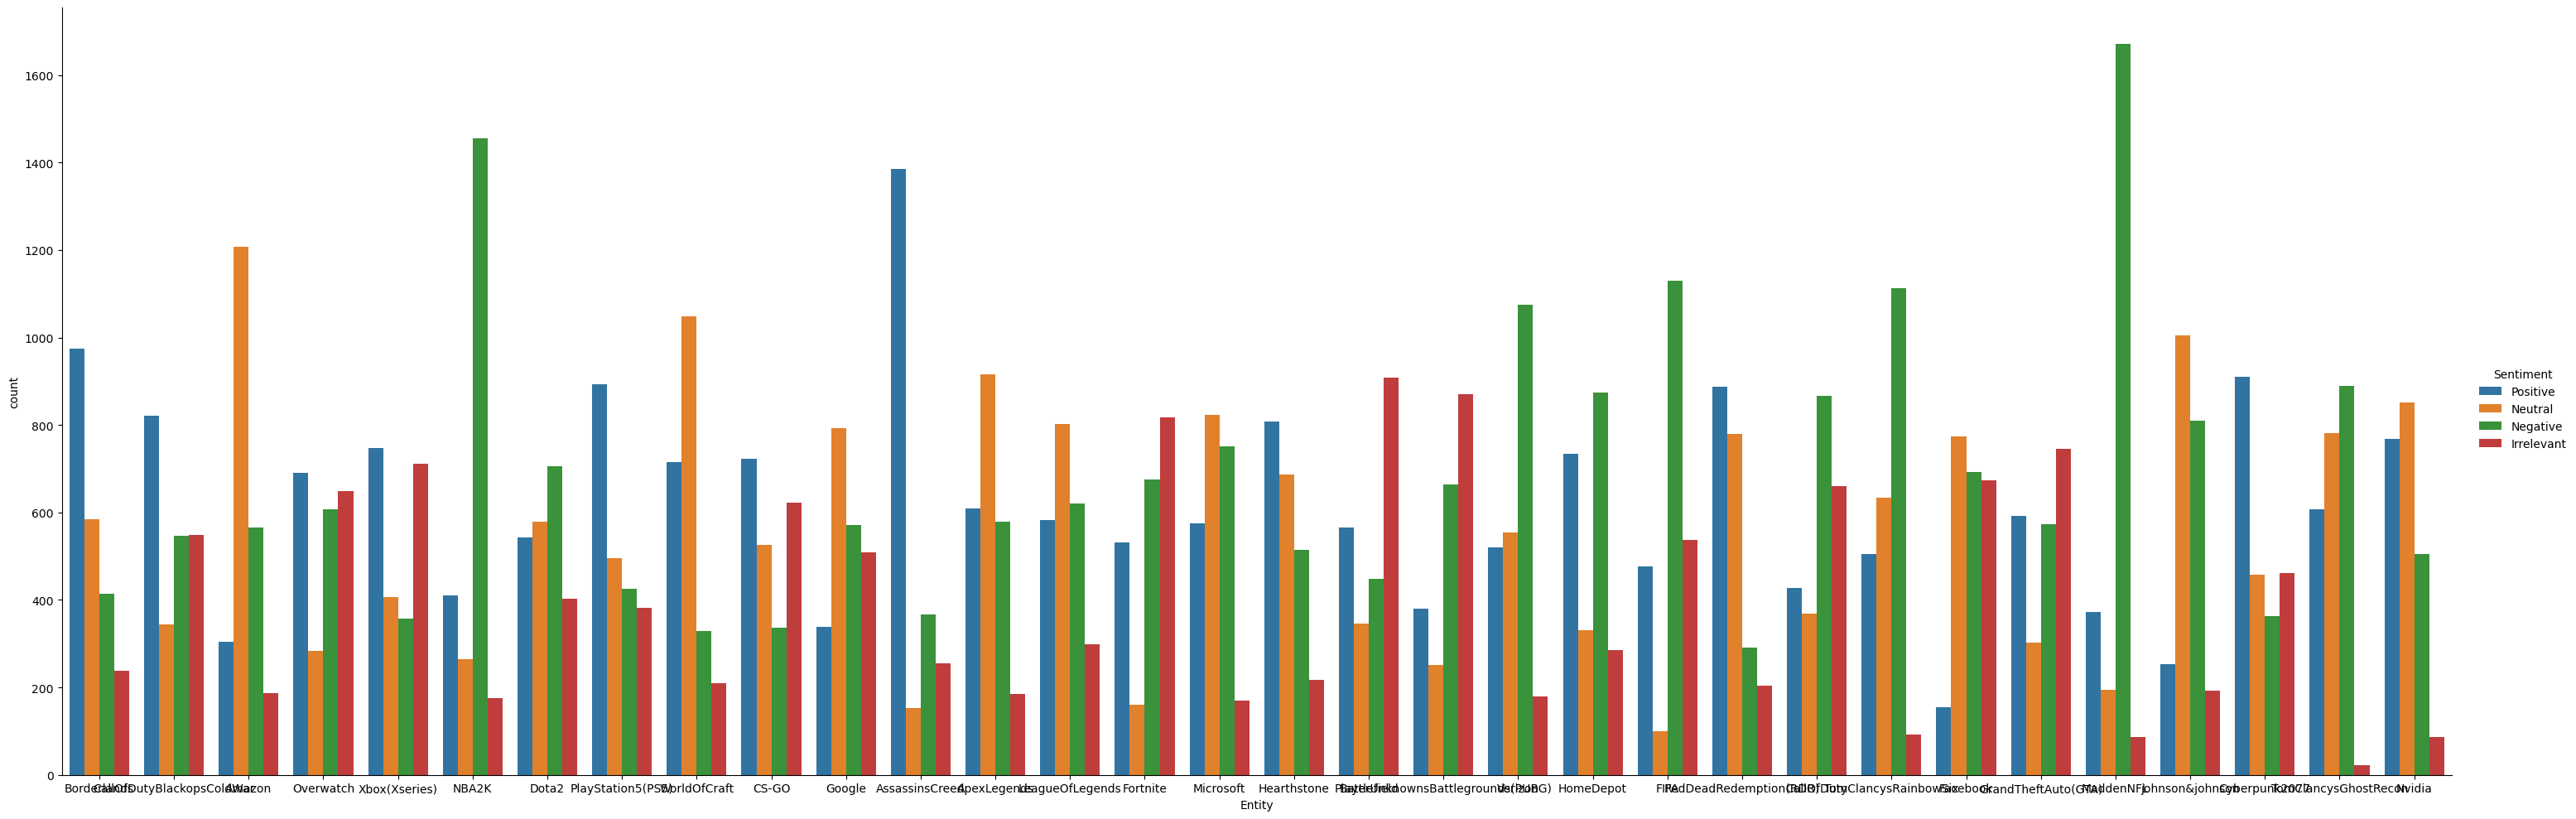

In [60]:
sns.catplot(x='Entity', hue='Sentiment', kind='count', height=10, aspect=3, data=df)
plt.show()

In [64]:
Entity_types = df1['Entity'].value_counts()
Entity_types

Entity
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                            

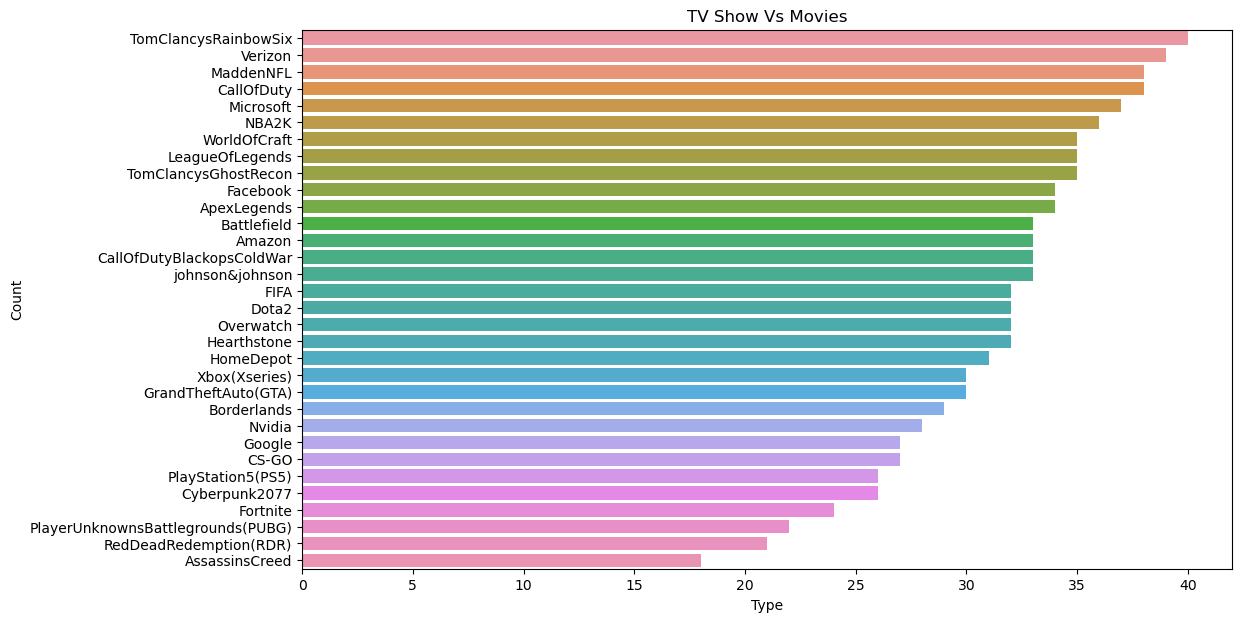

In [66]:
plt.figure(figsize=(12,7))
sns.barplot(x=Entity_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('TV Show Vs Movies')
plt.show()

In [68]:
sentiment_types = df1['Sentiment'].value_counts()
sentiment_types

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

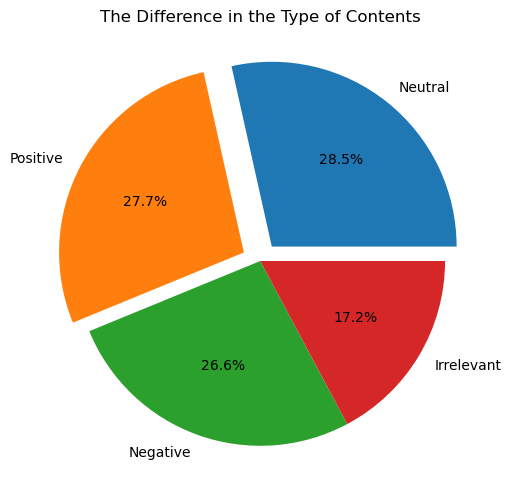

In [69]:
plt.figure(figsize=(12,6))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1,0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()